In [2]:
import pandas as pd

# Load the phishing dataset
# Read the first 10,000 rows from the CSV file
df_phishing = pd.read_csv('updated.csv', nrows=10000)
df_phishing.tail()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
9995,8540819,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-04-18T00:21:56+00:00,yes,2024-04-18T00:33:12+00:00,yes,Other
9996,8540818,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-04-18T00:11:53+00:00,yes,2024-04-18T00:23:00+00:00,yes,Other
9997,8540761,https://www.xxfj168.com/,http://www.phishtank.com/phish_detail.php?phis...,2024-04-17T23:00:22+00:00,yes,2024-04-17T23:03:39+00:00,yes,Other
9998,8540739,http://yandexv.com/honorcu/,http://www.phishtank.com/phish_detail.php?phis...,2024-04-17T22:20:52+00:00,yes,2024-04-17T22:22:53+00:00,yes,Other
9999,8540729,https://cloudflare-ipfs.com/ipfs/bafybeia5e6rj...,http://www.phishtank.com/phish_detail.php?phis...,2024-04-17T21:37:51+00:00,yes,2024-04-17T21:53:04+00:00,yes,LinkedIn


In [3]:
# Load the benign dataset
df_benign = pd.read_csv('Philippine_Benign_Bank_Links.csv')
df_benign.head()

,url,type
0,https://www.eastwestbanker.com/,benign
1,https://www.eastwestbanker.com/business,benign
2,https://priority.eastwestbanker.com/,benign
3,https://www.eastwestbanker.com/about,benign
4,https://m.me/EastWestBanker,benign


In [4]:
# Drop all columns except "url" in both datasets
df_phishing = df_phishing[['url']]
df_benign = df_benign[['url']]

# Add a new column called "type" filled with the value "phishing" for the phishing dataset
df_phishing['type'] = 'phishing'

# Add a new column called "type" filled with the value "benign" for the benign dataset
df_benign['type'] = 'benign'

# Concatenate the two datasets
df = pd.concat([df_phishing, df_benign])

# Save the concatenated DataFrame to a CSV file
df.to_csv('combined_dataset.csv', index=False)

# Print the count of phishing and benign URLs
print("Count of Phishing URLs:", len(df[df['type'] == 'phishing']))
print("Count of Benign URLs:", len(df[df['type'] == 'benign']))

df.head()

Count of Phishing URLs: 10000
Count of Benign URLs: 6574


<ipython-input-4-a23a060227a1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phishing['type'] = 'phishing'


,url,type
0,mybdo.sso-validate.uk,phishing
1,https://bit.ly./GLOBEG,phishing
2,ytb.watch/GcashClaimPromo,phishing
3,https://union-bnk-update.online/Login,phishing
4,https://khyd.lat/aa,phishing


In [5]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [6]:
def count_atrate(url):

    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

In [7]:
def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))

In [8]:
from urllib.parse import urlparse

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domain'] = df['url'].apply(lambda i: no_of_embed(i))

In [9]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [10]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0


df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [11]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

df['count-digits']= df['url'].apply(lambda i: digit_count(i))

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))


In [12]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [13]:
from googlesearch import search

def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [14]:
#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

import nltk
from nltk.tokenize import RegexpTokenizer


In [15]:
df.head()

,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,count-www,count%,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length
0,mybdo.sso-validate.uk,phishing,0,0,21,0,0,0,0,2,0,0,0,1,0,0,18,0,1,0
1,https://bit.ly./GLOBEG,phishing,0,0,22,0,1,1,1,2,0,0,0,0,0,0,16,1,1,7
2,ytb.watch/GcashClaimPromo,phishing,0,0,25,0,0,0,0,1,0,0,0,0,0,0,23,0,1,0
3,https://union-bnk-update.online/Login,phishing,0,0,37,0,1,1,0,1,0,0,0,2,0,0,30,1,1,23
4,https://khyd.lat/aa,phishing,0,0,19,0,1,1,0,1,0,0,0,0,0,0,14,1,1,8


In [16]:
pip install tld

In [17]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))


df2 = df.copy()


In [18]:
df.head()

,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,...,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld,tld_length
0,mybdo.sso-validate.uk,phishing,0,0,21,0,0,0,0,2,...,1,0,0,18,0,1,0,0,None,-1
1,https://bit.ly./GLOBEG,phishing,0,0,22,0,1,1,1,2,...,0,0,0,16,1,1,7,6,ly,2
2,ytb.watch/GcashClaimPromo,phishing,0,0,25,0,0,0,0,1,...,0,0,0,23,0,1,0,15,None,-1
3,https://union-bnk-update.online/Login,phishing,0,0,37,0,1,1,0,1,...,2,0,0,30,1,1,23,5,online,6
4,https://khyd.lat/aa,phishing,0,0,19,0,1,1,0,1,...,0,0,0,14,1,1,8,2,lat,3


In [19]:
df = df.drop("tld", axis=1)

In [20]:
df.columns

Index(['url', 'type', 'use_of_ip', 'count@', 'url_length',
       'count_embed_domain', 'count-https', 'count-http', 'short_url',
       'count.', 'count-www', 'count%', 'count?', 'count-', 'count=',
       'count-digits', 'count-letters', 'abnormal_url', 'google_index',
       'hostname_length', 'fd_length', 'tld_length'],
      dtype='object')

In [21]:
df['type'].value_counts()

,count
type,
phishing,10000
benign,6574


In [22]:
df.shape

(16574, 22)

In [23]:
df.to_excel("file_name.xlsx", index=False)

In [24]:
# Separate DataFrame into two based on 'type' column
df_benign = df[df['type'] == 'benign']
df_phishing = df[df['type'] == 'phishing']


In [25]:
df_benign.head()

,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,...,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld_length
0,https://www.eastwestbanker.com/,benign,0,0,31,0,1,1,0,2,...,0,0,0,0,25,1,1,22,0,3
1,https://www.eastwestbanker.com/business,benign,0,0,39,0,1,1,0,2,...,0,0,0,0,33,1,1,22,8,3
2,https://priority.eastwestbanker.com/,benign,0,0,36,0,1,1,0,2,...,0,0,0,0,30,1,1,27,0,3
3,https://www.eastwestbanker.com/about,benign,0,0,36,0,1,1,0,2,...,0,0,0,0,30,1,1,22,5,3
4,https://m.me/EastWestBanker,benign,0,0,27,0,1,1,0,1,...,0,0,0,0,22,1,1,4,14,2


In [26]:
df_benign.shape

(6574, 22)

In [27]:
df_phishing.head()

,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,...,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld_length
0,mybdo.sso-validate.uk,phishing,0,0,21,0,0,0,0,2,...,0,1,0,0,18,0,1,0,0,-1
1,https://bit.ly./GLOBEG,phishing,0,0,22,0,1,1,1,2,...,0,0,0,0,16,1,1,7,6,2
2,ytb.watch/GcashClaimPromo,phishing,0,0,25,0,0,0,0,1,...,0,0,0,0,23,0,1,0,15,-1
3,https://union-bnk-update.online/Login,phishing,0,0,37,0,1,1,0,1,...,0,2,0,0,30,1,1,23,5,6
4,https://khyd.lat/aa,phishing,0,0,19,0,1,1,0,1,...,0,0,0,0,14,1,1,8,2,3


In [28]:
df_phishing.shape

(10000, 22)

In [29]:
df_benign.describe()


,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,count-www,count%,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld_length
count,6574.0,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.0,6574.000000,6574.000000,6574.000000
mean,0.0,0.001825,59.172041,0.008366,0.969425,1.001825,0.002890,2.616215,0.784606,0.127320,0.107393,1.657438,0.134165,1.690447,46.963949,0.999544,1.0,16.648768,8.525859,4.313204
std,0.0,0.042689,28.552029,0.091091,0.184956,0.052299,0.053687,0.847824,0.414444,1.564401,0.310617,2.315735,0.504908,8.319819,21.360213,0.021359,0.0,4.285278,7.737173,1.582563
min,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.0,0.000000,0.000000,-1.000000
25%,0.0,0.000000,41.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,1.000000,1.0,14.000000,4.000000,3.000000
50%,0.0,0.000000,54.000000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,43.000000,1.000000,1.0,16.000000,8.000000,3.000000
75%,0.0,0.000000,71.000000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,57.000000,1.000000,1.0,19.000000,11.000000,6.000000
max,0.0,1.000000,625.000000,1.000000,2.000000,2.000000,1.000000,12.000000,2.000000,81.000000,2.000000,23.000000,13.000000,226.000000,322.000000,1.000000,1.0,43.000000,150.000000,7.000000


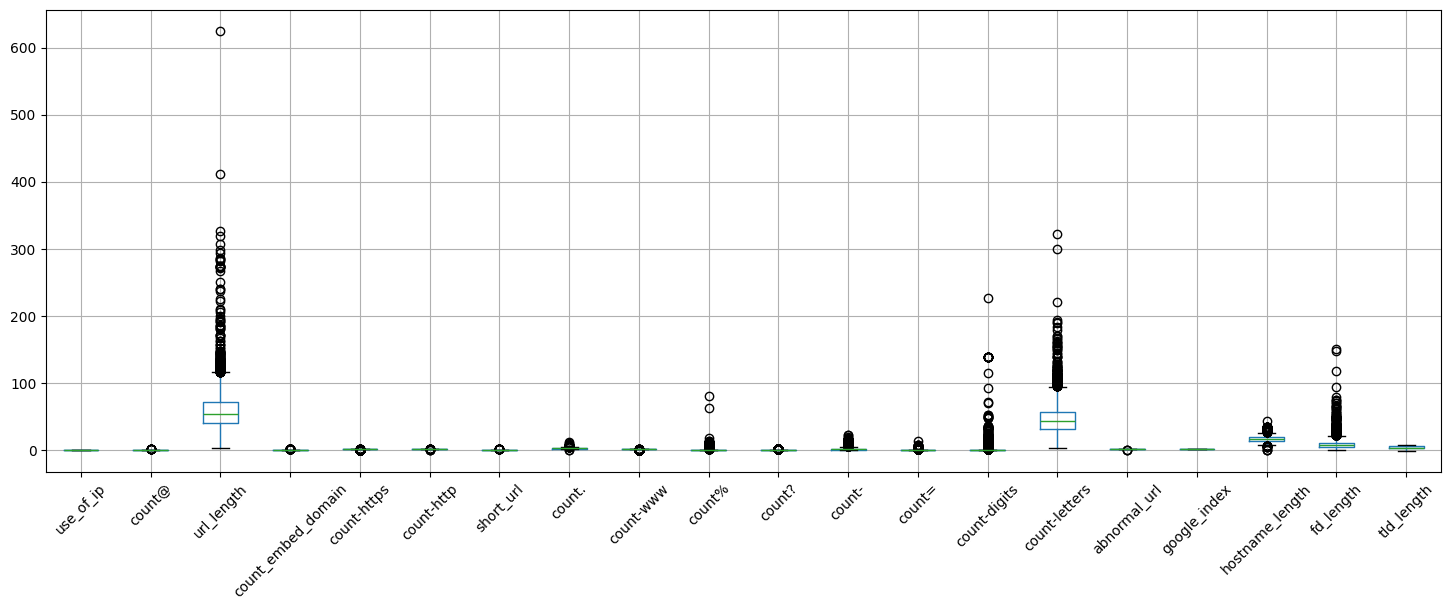

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
df_benign.boxplot()
plt.xticks(rotation=45)
plt.show()


In [31]:
import pandas as pd
from scipy import stats

# Assuming df_benign is already defined and contains the necessary data

# List of columns to process
columns_to_process = [
    'use_of_ip', 'count@', 'url_length', 'count_embed_domain', 'count-https', 'count-http',
    'short_url', 'count.', 'count-www', 'count%', 'count?', 'count-', 'count=', 'count-digits',
    'count-letters', 'abnormal_url', 'google_index', 'hostname_length', 'fd_length', 'tld_length'
]

# Dictionary to hold the DataFrames for each column
outliers_dfs = {}

# Threshold for Z-scores to consider an outlier
threshold = 3

# Total count of outliers
total_outliers_count = 0

print("Outliers in Benign Dataset using Z-Score\n")

# Loop through each column to calculate Z-scores, find outliers, and create DataFrames
for column in columns_to_process:
    # Calculate Z-scores
    z_scores = stats.zscore(df_benign[column])

    # Find outliers
    outliers = (z_scores > threshold) | (z_scores < -threshold)

    # Filter out the outliers
    outliers_df = df_benign[outliers]

    # Increment the total count of outliers
    total_outliers_count += len(outliers_df)

    # Create a DataFrame with the 'url', the column value, and the Z-score
    outliers_with_z_scores = pd.DataFrame({
        'url': outliers_df['url'],
        column: outliers_df[column],
        'z_score': z_scores[outliers]
    })

    # Add a column for the number of outliers, setting the value in the first row only
    outliers_with_z_scores['number_of_outliers'] = [len(outliers_with_z_scores)] + [None] * (len(outliers_with_z_scores) - 1)

    # Store the DataFrame in the dictionary
    outliers_dfs[column] = outliers_with_z_scores

    # Print the amount of outliers for the current column
    print(f"{column}: {len(outliers_df)}")

print("\nTotal amount of outliers in the Benign dataset using Z-score: " + str(total_outliers_count))

df.head()


Outliers in Benign Dataset using Z-Score

use_of_ip: 0
count@: 12
url_length: 61
count_embed_domain: 55
count-https: 231
count-http: 18
short_url: 19
count.: 21
count-www: 0
count%: 59
count?: 2
count-: 153
count=: 112
count-digits: 49
count-letters: 73
abnormal_url: 3
google_index: 0
hostname_length: 31
fd_length: 89
tld_length: 3

Total amount of outliers in the Benign dataset using Z-score: 991


,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,...,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld_length
0,mybdo.sso-validate.uk,phishing,0,0,21,0,0,0,0,2,...,0,1,0,0,18,0,1,0,0,-1
1,https://bit.ly./GLOBEG,phishing,0,0,22,0,1,1,1,2,...,0,0,0,0,16,1,1,7,6,2
2,ytb.watch/GcashClaimPromo,phishing,0,0,25,0,0,0,0,1,...,0,0,0,0,23,0,1,0,15,-1
3,https://union-bnk-update.online/Login,phishing,0,0,37,0,1,1,0,1,...,0,2,0,0,30,1,1,23,5,6
4,https://khyd.lat/aa,phishing,0,0,19,0,1,1,0,1,...,0,0,0,0,14,1,1,8,2,3


In [32]:
import pandas as pd

# Assuming df_benign is already defined and contains the necessary data

# List of columns to process
columns_to_process = [
    'use_of_ip', 'count@', 'url_length', 'count_embed_domain', 'count-https', 'count-http',
    'short_url', 'count.', 'count-www', 'count%', 'count?', 'count-', 'count=', 'count-digits',
    'count-letters', 'abnormal_url', 'google_index', 'hostname_length', 'fd_length', 'tld_length'
]

# Dictionary to hold the DataFrames for each column
outliers_dfs = {}

# Total count of outliers
total_outliers_count = 0

print("Outliers in Benign Dataset using Interquartile Range (IQR)\n")

# Loop through each column to calculate IQR, find outliers, and create DataFrames
for column in columns_to_process:
    # Calculate the first and third quartiles
    Q1 = df_benign[column].quantile(0.25)
    Q3 = df_benign[column].quantile(0.75)

    # Calculate the interquartile range
    IQR = Q3 - Q1

    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = (df_benign[column] < lower_bound) | (df_benign[column] > upper_bound)

    # Filter out the outliers
    outliers_df = df_benign[outliers]

    # Increment the total count of outliers
    total_outliers_count += len(outliers_df)

    # Create a DataFrame with the 'url', the column value, and the IQR
    outliers_with_IQR = pd.DataFrame({
        'url': outliers_df['url'],
        column: outliers_df[column],
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    })

    # Add a column for the number of outliers, setting the value in the first row only
    outliers_with_IQR['number_of_outliers'] = [len(outliers_with_IQR)] + [None] * (len(outliers_with_IQR) - 1)

    # Store the DataFrame in the dictionary
    outliers_dfs[column] = outliers_with_IQR

    # Print the amount of outliers for the current column
    print(f"{column}: {len(outliers_df)}")

print("\nTotal amount of outliers in the Benign dataset using Interquartile Range (IQR): " + str(total_outliers_count))


Outliers in Benign Dataset using Interquartile Range (IQR)

use_of_ip: 0
count@: 12
url_length: 173
count_embed_domain: 55
count-https: 231
count-http: 18
short_url: 19
count.: 46
count-www: 1434
count%: 128
count?: 704
count-: 391
count=: 676
count-digits: 1323
count-letters: 166
abnormal_url: 3
google_index: 0
hostname_length: 78
fd_length: 254
tld_length: 0

Total amount of outliers in the Benign dataset using Interquartile Range (IQR): 5711


In [33]:
df_phishing.describe()

,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,count-www,count%,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld_length
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000
mean,0.00160,0.018000,57.419800,0.001000,0.879800,1.011000,0.072100,2.117400,0.057900,0.047300,0.147700,0.885900,0.32090,6.193300,42.610900,0.998500,1.0,24.28150,5.332400,5.787600
std,0.03997,0.135933,57.378916,0.031609,0.364644,0.146564,0.258666,0.926339,0.234847,0.736286,0.379604,1.549039,0.94584,11.218713,45.260273,0.038703,0.0,14.00508,10.508137,4.115019
min,0.00000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.000000,0.000000,1.0,0.00000,0.000000,-1.000000
25%,0.00000,0.000000,28.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,21.000000,1.000000,1.0,15.00000,0.000000,3.000000
50%,0.00000,0.000000,40.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,30.000000,1.000000,1.0,21.00000,2.000000,3.000000
75%,0.00000,0.000000,62.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.00000,9.000000,44.000000,1.000000,1.0,30.00000,9.000000,9.000000
max,1.00000,3.000000,1403.000000,1.000000,6.000000,7.000000,1.000000,18.000000,2.000000,34.000000,8.000000,28.000000,10.00000,261.000000,1260.000000,1.000000,1.0,94.00000,270.000000,29.000000


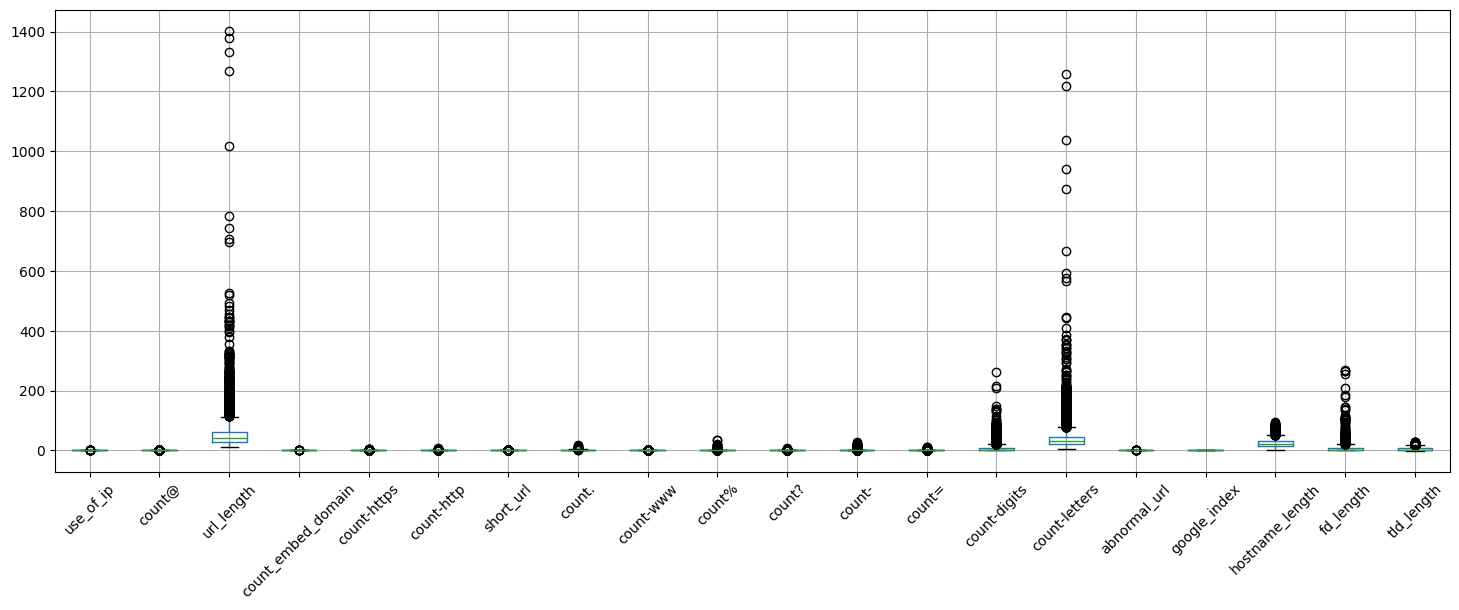

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
df_phishing.boxplot()
plt.xticks(rotation=45)
plt.show()


In [35]:
import pandas as pd
from scipy import stats

# Assuming df_benign is already defined and contains the necessary data

# List of columns to process
columns_to_process = [
    'use_of_ip', 'count@', 'url_length', 'count_embed_domain', 'count-https', 'count-http',
    'short_url', 'count.', 'count-www', 'count%', 'count?', 'count-', 'count=', 'count-digits',
    'count-letters', 'abnormal_url', 'google_index', 'hostname_length', 'fd_length', 'tld_length'
]

# Dictionary to hold the DataFrames for each column
outliers_dfs = {}

# Threshold for Z-scores to consider an outlier
threshold = 3

# Total count of outliers
total_outliers_count = 0

print("Outliers in Phishing Dataset using Z-Score\n")

# Loop through each column to calculate Z-scores, find outliers, and create DataFrames
for column in columns_to_process:
    # Calculate Z-scores
    z_scores = stats.zscore(df_phishing[column])

    # Find outliers
    outliers = (z_scores > threshold) | (z_scores < -threshold)

    # Filter out the outliers
    outliers_df = df_phishing[outliers]

    # Increment the total count of outliers
    total_outliers_count += len(outliers_df)

    # Create a DataFrame with the 'url', the column value, and the Z-score
    outliers_with_z_scores = pd.DataFrame({
        'url': outliers_df['url'],
        column: outliers_df[column],
        'z_score': z_scores[outliers]
    })

    # Add a column for the number of outliers, setting the value in the first row only
    outliers_with_z_scores['number_of_outliers'] = [len(outliers_with_z_scores)] + [None] * (len(outliers_with_z_scores) - 1)

    # Store the DataFrame in the dictionary
    outliers_dfs[column] = outliers_with_z_scores

    # Print the amount of outliers for the current column
    print(f"{column}: {len(outliers_df)}")

print("\nTotal amount of outliers in the Phishing dataset using Z-score: " + str(total_outliers_count))

Outliers in Phishing Dataset using Z-Score

use_of_ip: 16
count@: 177
url_length: 103
count_embed_domain: 10
count-https: 89
count-http: 115
short_url: 721
count.: 189
count-www: 576
count%: 42
count?: 60
count-: 151
count=: 193
count-digits: 132
count-letters: 91
abnormal_url: 15
google_index: 0
hostname_length: 201
fd_length: 98
tld_length: 227

Total amount of outliers in the Phishing dataset using Z-score: 3206


In [36]:
import pandas as pd

# Assuming df_benign is already defined and contains the necessary data

# List of columns to process
columns_to_process = [
    'use_of_ip', 'count@', 'url_length', 'count_embed_domain', 'count-https', 'count-http',
    'short_url', 'count.', 'count-www', 'count%', 'count?', 'count-', 'count=', 'count-digits',
    'count-letters', 'abnormal_url', 'google_index', 'hostname_length', 'fd_length', 'tld_length'
]

# Dictionary to hold the DataFrames for each column
outliers_dfs = {}

# Total count of outliers
total_outliers_count = 0

print("Outliers in Phishing Dataset using Interquartile Range (IQR)\n")

# Loop through each column to calculate IQR, find outliers, and create DataFrames
for column in columns_to_process:
    # Calculate the first and third quartiles
    Q1 = df_phishing[column].quantile(0.25)
    Q3 = df_phishing[column].quantile(0.75)

    # Calculate the interquartile range
    IQR = Q3 - Q1

    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = (df_phishing[column] < lower_bound) | (df_phishing[column] > upper_bound)

    # Filter out the outliers
    outliers_df = df_phishing[outliers]

    # Increment the total count of outliers
    total_outliers_count += len(outliers_df)

    # Create a DataFrame with the 'url', the column value, and the IQR
    outliers_with_IQR = pd.DataFrame({
        'url': outliers_df['url'],
        column: outliers_df[column],
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    })

    # Add a column for the number of outliers, setting the value in the first row only
    outliers_with_IQR['number_of_outliers'] = [len(outliers_with_IQR)] + [None] * (len(outliers_with_IQR) - 1)

    # Store the DataFrame in the dictionary
    outliers_dfs[column] = outliers_with_IQR

    # Print the amount of outliers for the current column
    print(f"{column}: {len(outliers_df)}")

print("\nTotal amount of outliers in the Phishing dataset using Interquartile Range (IQR): " + str(total_outliers_count))


Outliers in Phishing Dataset using Interquartile Range (IQR)

use_of_ip: 16
count@: 177
url_length: 997
count_embed_domain: 10
count-https: 1396
count-http: 115
short_url: 721
count.: 191
count-www: 576
count%: 139
count?: 1409
count-: 926
count=: 1314
count-digits: 626
count-letters: 1086
abnormal_url: 15
google_index: 0
hostname_length: 435
fd_length: 235
tld_length: 227

Total amount of outliers in the Phishing dataset using Interquartile Range (IQR): 10611


In [37]:
df.head()

,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https,count-http,short_url,count.,...,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld_length
0,mybdo.sso-validate.uk,phishing,0,0,21,0,0,0,0,2,...,0,1,0,0,18,0,1,0,0,-1
1,https://bit.ly./GLOBEG,phishing,0,0,22,0,1,1,1,2,...,0,0,0,0,16,1,1,7,6,2
2,ytb.watch/GcashClaimPromo,phishing,0,0,25,0,0,0,0,1,...,0,0,0,0,23,0,1,0,15,-1
3,https://union-bnk-update.online/Login,phishing,0,0,37,0,1,1,0,1,...,0,2,0,0,30,1,1,23,5,6
4,https://khyd.lat/aa,phishing,0,0,19,0,1,1,0,1,...,0,0,0,0,14,1,1,8,2,3


In [38]:
pip install lime

# CNN


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import lime
import lime.lime_tabular

# Visualize class distribution
sns.countplot(data=df, x='type')

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['url'])
vocab_size = len(tokenizer.word_index) + 1

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)


max_length = 600
embedding_dim = 100

# Tokenization: URLs are tokenized to transform them into a format that can be processed by a neural network.
sequences = tokenizer.texts_to_sequences(df['url'])
# Padding: This process ensures that all sequences (tokenized URLs) have the same length. Since neural networks process inputs in batches of fixed size, sequences must be uniform in length.
X_text = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encode target labels
lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
y = df['type_code']

# Include extracted features
X_features = df.drop(['url', 'type', 'type_code'], axis=1)

# Combine text and features
X_combined = np.hstack((X_text, X_features))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


# Select a sample input to visualize
sample_input = np.expand_dims(X_test[0], axis=0)



# CNN model
model = Sequential() #Type of data model processes
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))  #O(1)
model.add(Conv1D(64, 5, activation='relu')) #Dense O(Input * Kernel * max_length * Neurons)
model.add(GlobalMaxPooling1D()) #O(W)
model.add(Dense(32, activation='relu')) #Dense O(Input * Neuron)
model.add(Dropout(0.5)) #O(1)
model.add(Dense(1, activation='sigmoid')) #Dense layer O(Input * Neuron)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Model summary
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Save the trained model
model.save('trained_modelCNN.h5')

from google.colab import files

# Download the trained model
files.download('trained_modelCNN.h5')

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['benign', 'phishing'], columns=['benign', 'phishing'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 90s 232ms/step - accuracy: 0.8417 - loss: 0.3383 - val_accuracy: 0.9879 - val_loss: 0.0406
Epoch 2/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 55s 153ms/step - accuracy: 0.9943 - loss: 0.0393 - val_accuracy: 0.9921 - val_loss: 0.0273
Epoch 3/7
256/332 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.9987 - loss: 0.0237

In [ ]:
#DNN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_csv('combined_dataset.csv')

# Visualize class distribution
sns.countplot(data=df, x='type')

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['url'])
vocab_size = len(tokenizer.word_index) + 1

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)


max_length = 100
embedding_dim = 100

# Tokenization: URLs are tokenized to transform them into a format that can be processed by a neural network.
sequences = tokenizer.texts_to_sequences(df['url'])
# Padding: This process ensures that all sequences (tokenized URLs) have the same length. Since neural networks process inputs in batches of fixed size, sequences must be uniform in length.
X_text = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encode target labels
lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
y = df['type_code']

# Include extracted features
X_features = df.drop(['url', 'type', 'type_code'], axis=1)

# Combine text and features
X_combined = np.hstack((X_text, X_features))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# DNN model
model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Save the trained model
model.save('trained_modelDNN.h5')

from google.colab import files

# Download the trained model
# files.download('trained_modelDNN.h5')

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['benign', 'phishing'], columns=['benign', 'phishing'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
# Download the trained model
# files.download('trained_modelDNN.h5')


## RNN-LSTM

In [ ]:
#RNN-LSTM Hybrid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SimpleRNN, SpatialDropout1D

# Load dataset
df = pd.read_csv('combined_dataset.csv')

# Visualize class distribution
sns.countplot(data=df, x='type')

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['url'])
vocab_size = len(tokenizer.word_index) + 1

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)


max_length = 100
embedding_dim = 100

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['url'])
# Pad sequences
X_text = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encode target labels
lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
y = df['type_code']

# Include extracted features
X_features = df.drop(['url', 'type', 'type_code'], axis=1)

# Combine text and features
X_combined = np.hstack((X_text, X_features))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)



# Define the model architecture
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(32, return_sequences=True))  # Add a SimpleRNN layer
model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2)) #Add an LSTM layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# Model summary
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Save the trained model
model.save('trained_modelRNN-LSTM.h5')

from google.colab import files

# Download the trained model
# files.download('trained_modelDNN.h5')

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['benign', 'phishing'], columns=['benign', 'phishing'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()